## The purpose of this exercise is to explore the NASA Astronauts dataset publish here : https://www.kaggle.com/nasa/astronaut-yearbook/downloads/astronaut-yearbook.zip/1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('astronauts.csv')
data.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [3]:
data.shape

(357, 19)

## Education background

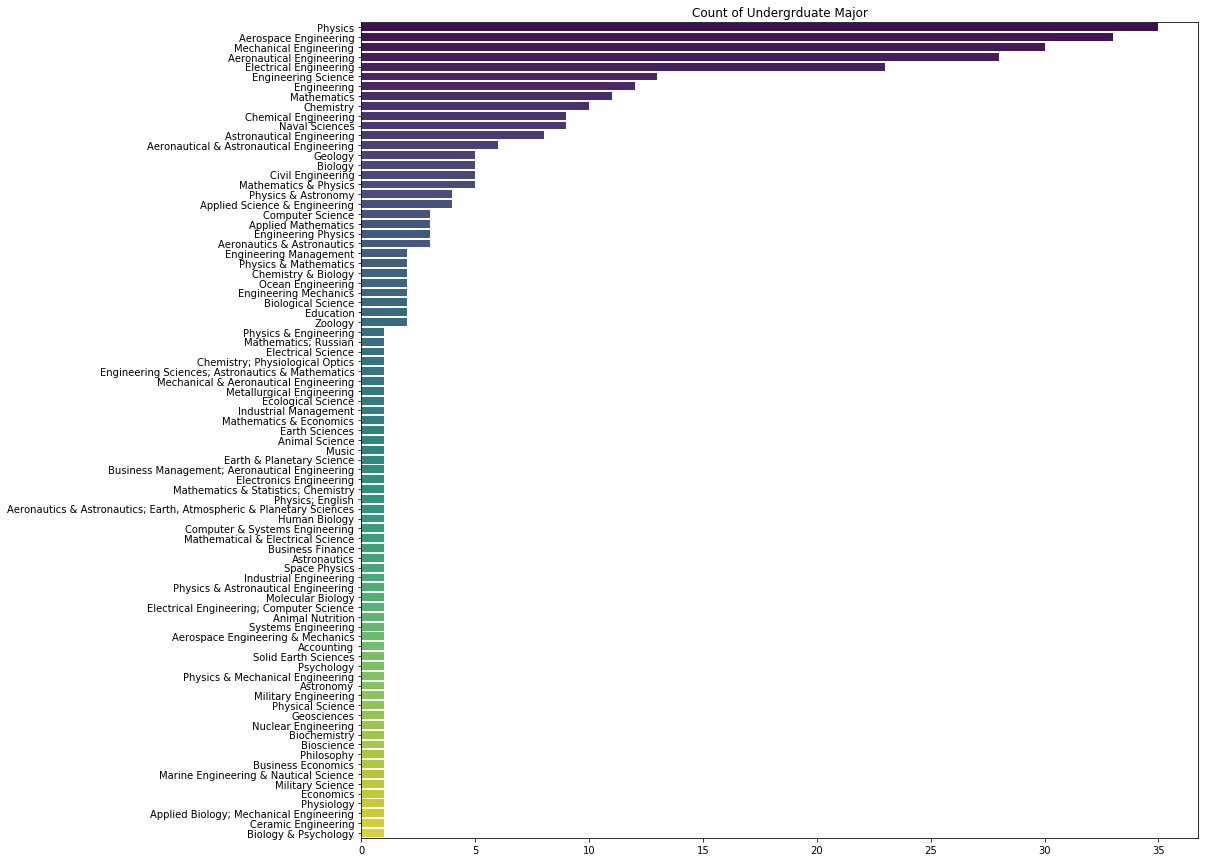

In [4]:
plt.figure(figsize=(15,15))
major =sns.countplot(y=data['Undergraduate Major'],
              palette="viridis",
             order= data['Undergraduate Major'].value_counts().index)
plt.title('Count of Undergrduate Major')
major.set_ylabel('')
major.set_xlabel('')
plt.show()

#### Astronauts with undergraduate engineering background

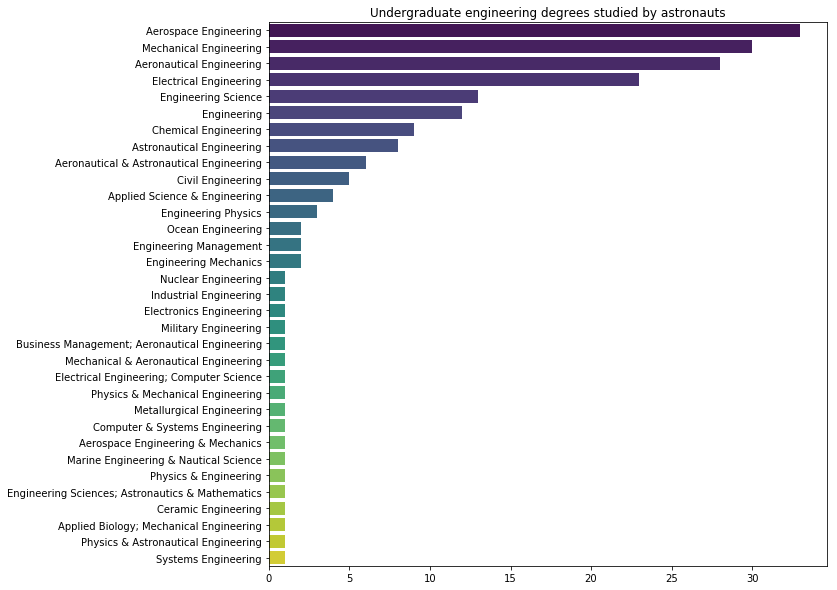

In [5]:
engineers=data[data['Undergraduate Major'].str.contains('Engineering',na=False)]
engineers.shape
plt.figure(figsize=(10,10))
eng=sns.countplot(y=engineers['Undergraduate Major'],
              palette="viridis",
              order = engineers['Undergraduate Major'].value_counts().index)
plt.title('Undergraduate engineering degrees studied by astronauts')
eng.set_ylabel('')
eng.set_xlabel('')
plt.show()

#### Graduate major

In [6]:
grad_deg=data['Graduate Major'].count()/data['Name'].count()
print("{:.2%}".format(grad_deg)+ " of astronauts have a graduate degree")

83.47% of astronauts have a graduate degree


## Gender of Astronauts

In [7]:
data.groupby('Gender')['Name'].nunique()

Gender
Female     50
Male      307
Name: Name, dtype: int64

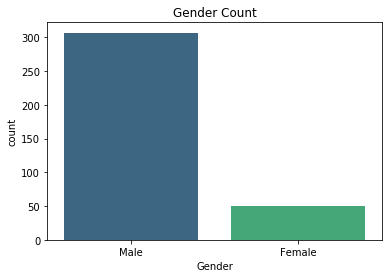

In [8]:
gender = sns.countplot(data['Gender'],palette="viridis")
gender.grid(False)
plt.title('Gender Count')
plt.show()

## Military Ranks and Divisions

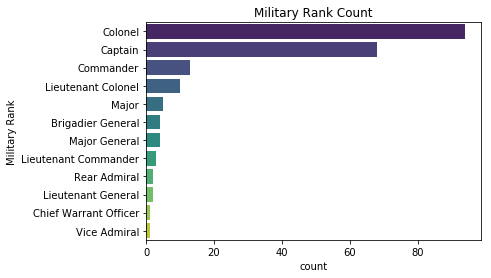

In [9]:
rank = sns.countplot(y=data['Military Rank'],
                     palette="viridis",
                     order = data['Military Rank'].value_counts().index)
rank.grid(False)
plt.title('Military Rank Count')
plt.show()

In [10]:
data.groupby('Military Rank').sum()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
Military Rank,,,,,,
Brigadier General,7915.0,27.0,8,1592,5,32.0
Captain,132923.0,733.0,180,97044,83,505.5
Chief Warrant Officer,0.0,0.0,1,166,0,0.0
Colonel,184654.0,1072.0,248,131357,108,659.5
Commander,25931.0,197.0,16,11595,14,81.0
Lieutenant Colonel,19837.0,106.0,21,4064,5,25.5
Lieutenant Commander,5935.0,26.0,4,551,0,0.0
Lieutenant General,3952.0,15.0,9,5570,1,9.0
Major,7866.0,17.0,4,457,0,0.0


#### Branch of Military

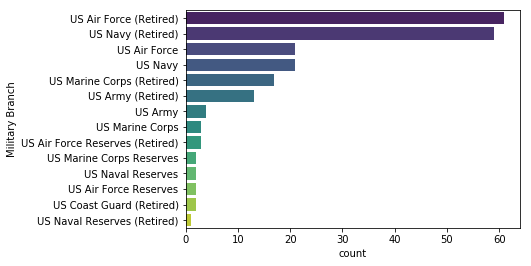

In [11]:
sns.countplot(y=data['Military Branch'], palette="viridis",
                  order = data['Military Branch'].value_counts().index)
plt.show()

## Status of astronauts

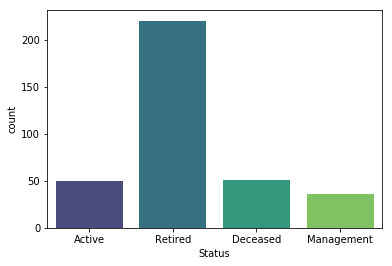

In [12]:
sns.countplot(data['Status'],palette="viridis")

In [15]:
death=data["Death Mission"].count()
print("The number of astronauts that went on a death mission:",death)

The number of astronauts that went on a death mission: 16


## Space walks and Space flights

In [16]:
pd.DataFrame(data.groupby('Gender')['Space Flights'].sum())

,Space Flights
Gender,
Female,120
Male,724


In [17]:
pd.DataFrame(data.groupby('Gender')['Space Flight (hr)'].sum())

,Space Flight (hr)
Gender,
Female,78865
Male,367123


In [18]:
pd.DataFrame(data.groupby('Gender')['Space Walks'].sum())

,Space Walks
Gender,
Female,30
Male,415


In [19]:
pd.DataFrame(data.groupby('Gender')['Space Walks (hr)'].sum())

,Space Walks (hr)
Gender,
Female,222.0
Male,2529.5


In [20]:
pd.DataFrame(data.groupby('Military Rank')['Space Walks'].sum())

,Space Walks
Military Rank,
Brigadier General,5
Captain,83
Chief Warrant Officer,0
Colonel,108
Commander,14
Lieutenant Colonel,5
Lieutenant Commander,0
Lieutenant General,1
Major,0
